In [38]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A look at the meme templates we want to classify

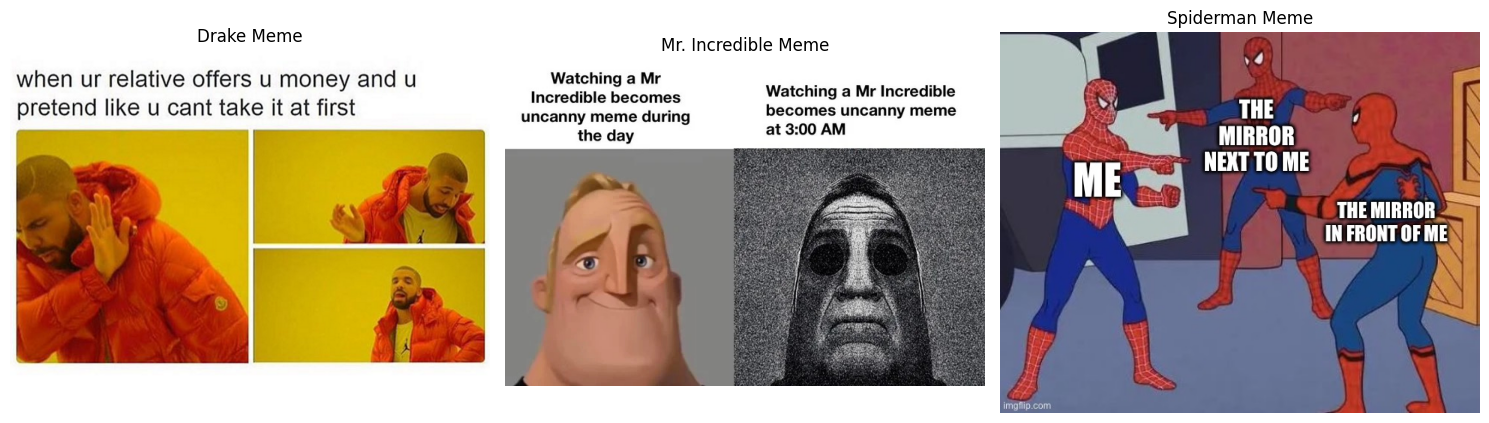

In [40]:
# Load the images
img1 = mpimg.imread('/content/drive/MyDrive/classification/drake/drake1.png')
img2 = mpimg.imread('/content/drive/MyDrive/classification/incredible/incredible1.jpg')
img3 = mpimg.imread('/content/drive/MyDrive/classification/spidey/spidey1.jpg')

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Display the images on the subplots
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('Drake Meme')

axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('Mr. Incredible Meme')

axs[2].imshow(img3)
axs[2].axis('off')
axs[2].set_title('Spiderman Meme')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# Converting all images in the dataset to Jpeg format for consistency


In [41]:
from PIL import Image

main_directory = '/content/drive/MyDrive/classification'

subdirectories = ['drake', 'incredible', 'spidey']

# Loop through each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(main_directory, subdir)

    output_directory = os.path.join('/content/drive/MyDrive/MemeNet', f'{subdir}')
    os.makedirs(output_directory, exist_ok=True)

    # Loop through each image file in the subdirectory
    for filename in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, filename)

        # Open and convert the image to JPEG format
        with Image.open(image_path) as img:
            # Construct the output JPEG filename
            output_filename = os.path.splitext(filename)[0] + '.jpg'
            output_path = os.path.join(output_directory, output_filename)

            # Save the image as JPEG
            if img.mode != 'RGB':
              img = img.convert('RGB')
            img.save(output_path, 'JPEG')

# Split into Training, Testing and Validation

In [148]:
batch_size = 8
img_height = 256
img_width = 256

In [149]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/MemeNet',
  validation_split=0.3,
  subset="training",
  seed = 10,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 226 files belonging to 3 classes.
Using 159 files for training.


In [150]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/MemeNet',
  validation_split=0.3,
  subset="validation",
  seed = 10,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 226 files belonging to 3 classes.
Using 67 files for validation.


In [151]:
class_names = train_ds.class_names
print(class_names)


['drake', 'incredible', 'spidey']


In [152]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),]
)


In [153]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [154]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [155]:
epochs=7
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/7
20/20 [==============================] - 23s 1s/step - loss: 22.7026 - accuracy: 0.5346 - val_loss: 1.5212 - val_accuracy: 0.7612
Epoch 2/7
20/20 [==============================] - 22s 1s/step - loss: 0.6993 - accuracy: 0.8805 - val_loss: 0.5626 - val_accuracy: 0.8806
Epoch 3/7
20/20 [==============================] - 22s 1s/step - loss: 0.0779 - accuracy: 0.9748 - val_loss: 0.0390 - val_accuracy: 0.9851
Epoch 4/7
20/20 [==============================] - 20s 1s/step - loss: 0.0214 - accuracy: 0.9874 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/7
20/20 [==============================] - 22s 1s/step - loss: 0.0330 - accuracy: 0.9937 - val_loss: 0.0177 - val_accuracy: 0.9851
Epoch 6/7
20/20 [==============================] - 22s 1s/step - loss: 0.0342 - accuracy: 0.9811 - val_loss: 0.0229 - val_accuracy: 0.9851
Epoch 7/7
20/20 [==============================] - 21s 1s/step - loss: 0.0207 - accuracy: 0.9874 - val_loss: 0.0513 - val_accuracy: 0.9701


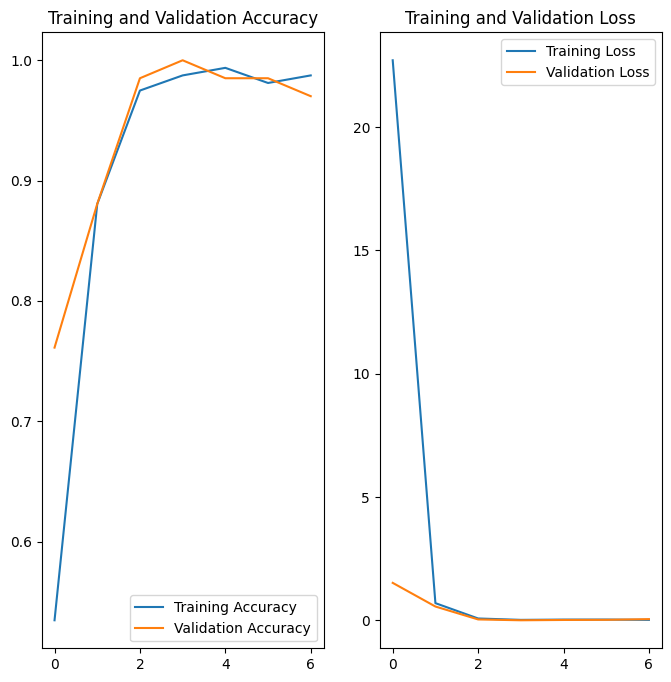

In [156]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Prediction on unseen images

In [157]:
!wget https://i.imgflip.com/67jakj.jpg

--2023-08-15 12:33:37--  https://i.imgflip.com/67jakj.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.255.14, 104.18.64.15
Connecting to i.imgflip.com (i.imgflip.com)|104.18.255.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66243 (65K) [image/jpeg]
Saving to: ‘67jakj.jpg.4’

67jakj.jpg.4        100%[===================>]  64.69K  --.-KB/s    in 0.006s  

2023-08-15 12:33:37 (10.5 MB/s) - ‘67jakj.jpg.4’ saved [66243/66243]



In [158]:
!wget https://slidechef.net/wp-content/uploads/2023/03/mr-incredible-meme.jpg

--2023-08-15 12:33:38--  https://slidechef.net/wp-content/uploads/2023/03/mr-incredible-meme.jpg
Resolving slidechef.net (slidechef.net)... 104.21.35.90, 172.67.216.60, 2606:4700:3035::6815:235a, ...
Connecting to slidechef.net (slidechef.net)|104.21.35.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102041 (100K) [image/jpeg]
Saving to: ‘mr-incredible-meme.jpg.4’

mr-incredible-meme. 100%[===================>]  99.65K  --.-KB/s    in 0.01s   

2023-08-15 12:33:38 (9.07 MB/s) - ‘mr-incredible-meme.jpg.4’ saved [102041/102041]



In [159]:
!wget https://static.wikia.nocookie.net/lol/images/d/d1/Drake-hotline-bling-airplane-seats-memes.jpg

--2023-08-15 12:33:38--  https://static.wikia.nocookie.net/lol/images/d/d1/Drake-hotline-bling-airplane-seats-memes.jpg
Resolving static.wikia.nocookie.net (static.wikia.nocookie.net)... 74.120.184.204, 74.120.184.194
Connecting to static.wikia.nocookie.net (static.wikia.nocookie.net)|74.120.184.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58576 (57K) [image/jpeg]
Saving to: ‘Drake-hotline-bling-airplane-seats-memes.jpg.4’

Drake-hotline-bling 100%[===================>]  57.20K  --.-KB/s    in 0.04s   

2023-08-15 12:33:38 (1.27 MB/s) - ‘Drake-hotline-bling-airplane-seats-memes.jpg.4’ saved [58576/58576]



In [160]:
def predict_and_visualize(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(
        "This image most likely belongs to the {} class with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

1/1 [==============================] - 0s 92ms/step


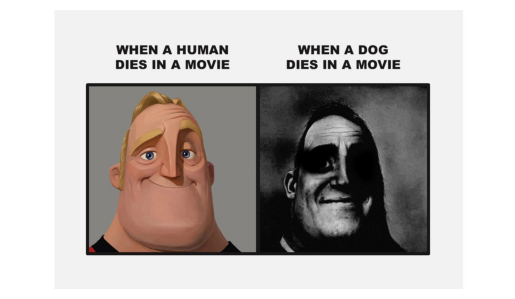

This image most likely belongs to the incredible class with a 99.32 percent confidence.


In [161]:
predict_and_visualize('/content/mr-incredible-meme.jpg')

1/1 [==============================] - 0s 46ms/step


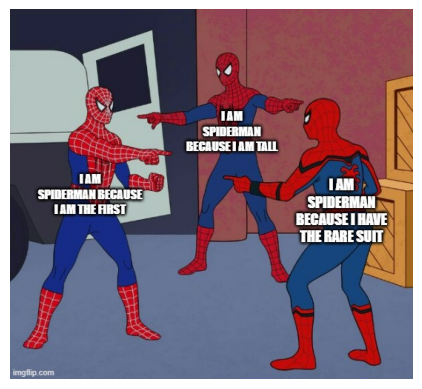

This image most likely belongs to the spidey class with a 100.00 percent confidence.


In [162]:
predict_and_visualize('/content/67jakj.jpg')

1/1 [==============================] - 0s 54ms/step


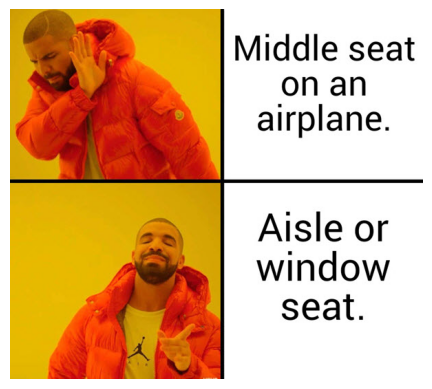

This image most likely belongs to the drake class with a 100.00 percent confidence.


In [163]:
predict_and_visualize('/content/Drake-hotline-bling-airplane-seats-memes.jpg')

# Let's try a few confusing cases

In [164]:
!wget https://i.imgflip.com/6fcuv1.jpg

--2023-08-15 12:33:39--  https://i.imgflip.com/6fcuv1.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.255.14, 104.18.64.15
Connecting to i.imgflip.com (i.imgflip.com)|104.18.255.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42216 (41K) [image/jpeg]
Saving to: ‘6fcuv1.jpg.4’

6fcuv1.jpg.4        100%[===================>]  41.23K  --.-KB/s    in 0.001s  

2023-08-15 12:33:39 (38.8 MB/s) - ‘6fcuv1.jpg.4’ saved [42216/42216]



In [165]:
!wget https://i.imgflip.com/69abta.jpg

--2023-08-15 12:33:39--  https://i.imgflip.com/69abta.jpg
Resolving i.imgflip.com (i.imgflip.com)... 104.18.255.14, 104.18.64.15
Connecting to i.imgflip.com (i.imgflip.com)|104.18.255.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59680 (58K) [image/jpeg]
Saving to: ‘69abta.jpg.4’

69abta.jpg.4        100%[===================>]  58.28K  --.-KB/s    in 0.007s  

2023-08-15 12:33:40 (7.97 MB/s) - ‘69abta.jpg.4’ saved [59680/59680]



1/1 [==============================] - 0s 46ms/step


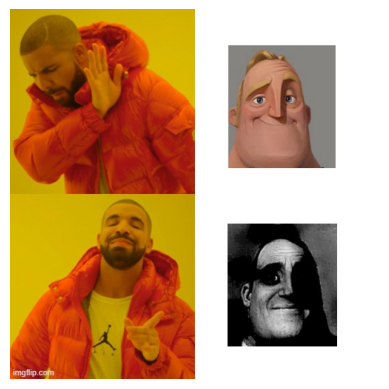

This image most likely belongs to the drake class with a 100.00 percent confidence.


In [166]:
predict_and_visualize('/content/6fcuv1.jpg')

1/1 [==============================] - 0s 49ms/step


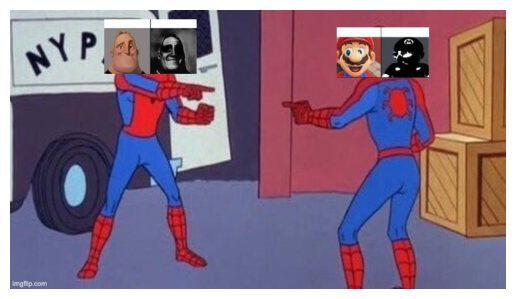

This image most likely belongs to the spidey class with a 100.00 percent confidence.


In [167]:
predict_and_visualize('/content/69abta.jpg')

# Now lets try related images that we didn't include in our dataset

In [168]:
!wget https://www.comingsoon.net/wp-content/uploads/sites/3/2023/05/spider-verse-sequel-e1683908983313.jpg

--2023-08-15 12:33:40--  https://www.comingsoon.net/wp-content/uploads/sites/3/2023/05/spider-verse-sequel-e1683908983313.jpg
Resolving www.comingsoon.net (www.comingsoon.net)... 104.17.204.94, 104.17.251.89, 2606:4700::6811:fb59, ...
Connecting to www.comingsoon.net (www.comingsoon.net)|104.17.204.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95733 (93K) [image/jpeg]
Saving to: ‘spider-verse-sequel-e1683908983313.jpg.4’

spider-verse-sequel 100%[===================>]  93.49K  --.-KB/s    in 0.01s   

2023-08-15 12:33:40 (8.80 MB/s) - ‘spider-verse-sequel-e1683908983313.jpg.4’ saved [95733/95733]



In [169]:
!wget https://uploads.dailydot.com/e68/65/9fbec55aea316047.jpg

--2023-08-15 12:33:40--  https://uploads.dailydot.com/e68/65/9fbec55aea316047.jpg
Resolving uploads.dailydot.com (uploads.dailydot.com)... 151.101.22.208, 2a04:4e42:5::720
Connecting to uploads.dailydot.com (uploads.dailydot.com)|151.101.22.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40914 (40K) [image/jpeg]
Saving to: ‘9fbec55aea316047.jpg.4’

9fbec55aea316047.jp 100%[===================>]  39.96K  --.-KB/s    in 0.003s  

2023-08-15 12:33:41 (15.1 MB/s) - ‘9fbec55aea316047.jpg.4’ saved [40914/40914]



In [170]:
!wget https://img.buzzfeed.com/buzzfeed-static/static/2015-10/20/11/campaign_images/webdr13/proof-that-drake-can-always-dance-on-beat-2-2531-1445355934-7_dblbig.jpg

--2023-08-15 12:33:41--  https://img.buzzfeed.com/buzzfeed-static/static/2015-10/20/11/campaign_images/webdr13/proof-that-drake-can-always-dance-on-beat-2-2531-1445355934-7_dblbig.jpg
Resolving img.buzzfeed.com (img.buzzfeed.com)... 151.101.2.114, 151.101.66.114, 151.101.130.114, ...
Connecting to img.buzzfeed.com (img.buzzfeed.com)|151.101.2.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18317 (18K) [image/jpeg]
Saving to: ‘proof-that-drake-can-always-dance-on-beat-2-2531-1445355934-7_dblbig.jpg.4’

proof-that-drake-ca 100%[===================>]  17.89K  --.-KB/s    in 0.001s  

2023-08-15 12:33:41 (27.6 MB/s) - ‘proof-that-drake-can-always-dance-on-beat-2-2531-1445355934-7_dblbig.jpg.4’ saved [18317/18317]



1/1 [==============================] - 0s 58ms/step


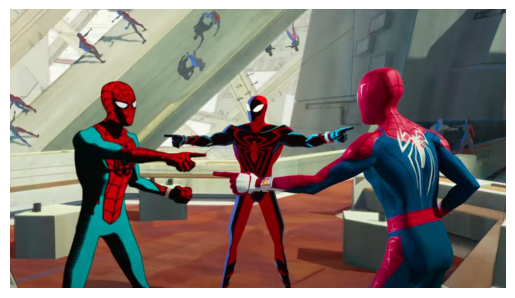

This image most likely belongs to the spidey class with a 83.11 percent confidence.


In [171]:
predict_and_visualize('/content/spider-verse-sequel-e1683908983313.jpg')

1/1 [==============================] - 0s 56ms/step


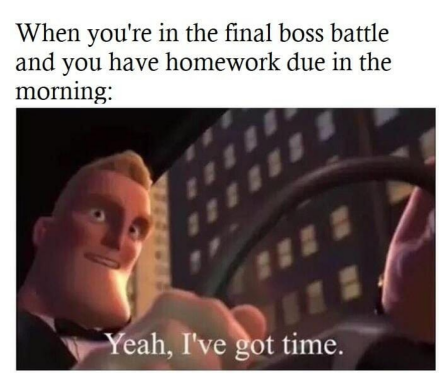

This image most likely belongs to the incredible class with a 99.94 percent confidence.


In [172]:
predict_and_visualize('/content/9fbec55aea316047.jpg')

1/1 [==============================] - 0s 60ms/step


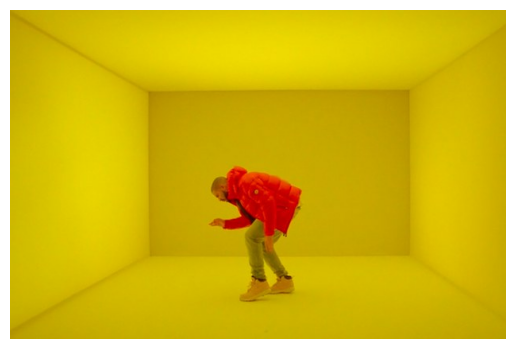

This image most likely belongs to the drake class with a 100.00 percent confidence.


In [173]:
predict_and_visualize('/content/proof-that-drake-can-always-dance-on-beat-2-2531-1445355934-7_dblbig.jpg')

In [174]:
!wget https://www.cdc.gov/healthypets/images/pets/cute-dog-headshot.jpg

--2023-08-15 12:33:42--  https://www.cdc.gov/healthypets/images/pets/cute-dog-headshot.jpg
Resolving www.cdc.gov (www.cdc.gov)... 104.81.184.13, 2600:1409:9800:887::2461, 2600:1409:9800:88b::2461
Connecting to www.cdc.gov (www.cdc.gov)|104.81.184.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277860 (271K) [image/jpeg]
Saving to: ‘cute-dog-headshot.jpg.4’

cute-dog-headshot.j 100%[===================>] 271.35K  --.-KB/s    in 0.04s   

2023-08-15 12:33:42 (6.58 MB/s) - ‘cute-dog-headshot.jpg.4’ saved [277860/277860]



In [175]:
model.save('MemeDetect.keras')